In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp '/content/Facebook_Marketplace_data.csv' '/content/drive/MyDrive'

cp: cannot stat '/content/Facebook_Marketplace_data.csv': No such file or directory


In [3]:
import pandas as pd

import matplotlib.pyplot as plt


In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/Facebook_Marketplace_data.csv')

In [5]:
dataset['status_published']=pd.to_datetime(dataset['status_published'])

In [6]:
dataset['hour']=dataset['status_published'].dt.hour

In [7]:
hourly_reactions=dataset.groupby('hour')['num_reactions'].sum()

1.	How does the time of upload (`status_published`)  affects the `num_reaction`?

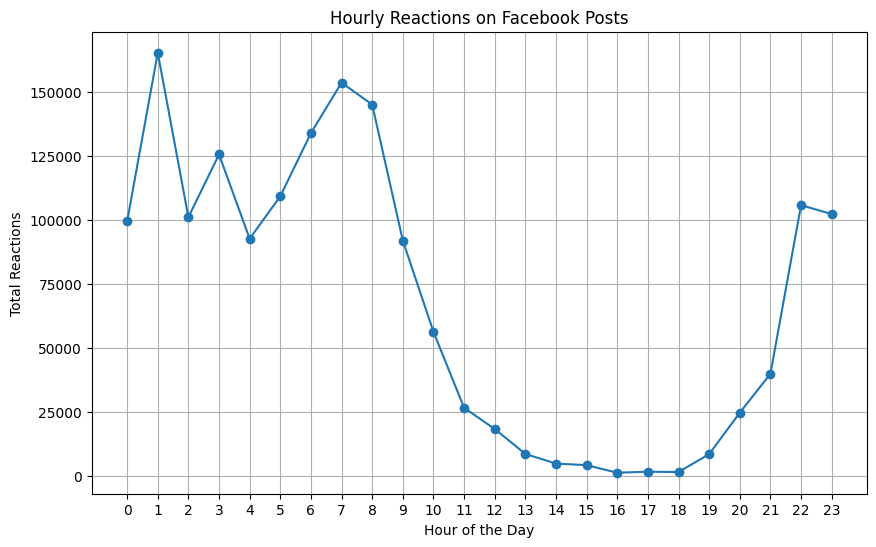

In [8]:
plt.figure(figsize=(10,6))
plt.plot(hourly_reactions.index,hourly_reactions.values,marker='o',linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Reactions')
plt.title('Hourly Reactions on Facebook Posts')
plt.grid(True)
plt.xticks(range(24))
plt.show()

###	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

In [9]:
columns_to_impute=['num_reactions','num_comments','num_shares']

In [10]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
dataset[columns_to_impute]=imputer.fit_transform(dataset[columns_to_impute])

In [11]:
correlation_matrix=dataset[['num_reactions','num_comments','num_shares']].corr()
print(correlation_matrix)

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


###Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset

In [12]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select the relevant columns
x=dataset[['status_type', 'num_reactions', 'num_comments', 'num_shares',
             'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=ct.fit_transform(x)


4.	Use the elbow method to find the optimum number of clusters.

In [13]:
wcss=[]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

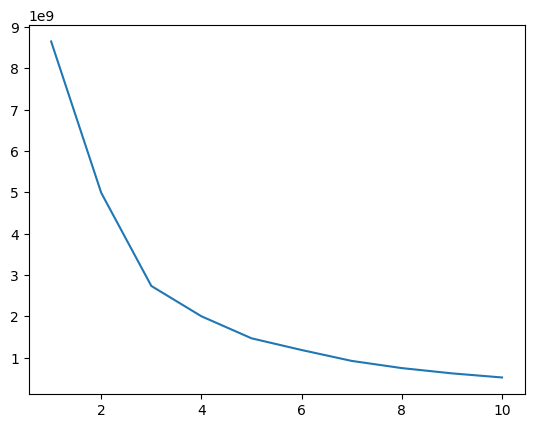

In [14]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)


We can see that the optimal number of clusters are 5
3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

In [25]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5.	What is the count of different types of posts in the dataset?
6.	What is the average value of num_reaction, num_comments, num_shares for each post type?


In [30]:
types_of_post=dataset.groupby('status_type')
print(types_of_post.count())
print('Averange reactions by type\n')
print(types_of_post['num_reactions'].mean())

             status_id  status_published  num_reactions  num_comments  \
status_type                                                             
link                63                63             63            63   
photo             4288              4288           4288          4288   
status             365               365            365           365   
video             2334              2334           2334          2334   

             num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
status_type                                                                    
link                 63         63         63        63         63        63   
photo              4288       4288       4288      4288       4288      4288   
status              365        365        365       365        365       365   
video              2334       2334       2334      2334       2334      2334   

             num_angrys  Column1  Column2  Column3  Column4  hour  
status_type 